In [1]:
import os
import matplotlib.pylab as plt
import numpy as np

%matplotlib inline

In [2]:
def load_data(data_file):
    angle = []
    center = []
    left = []
    right = []

    dirname = os.path.dirname(data_file)
    with open(data_file) as f:
        f.readline()
        for line in f:
            fields = line.strip().split(", ")
            angle.append(np.float32(fields[3]))
            center.append(os.path.join(dirname, fields[0]))
            left.append(os.path.join(dirname, fields[1]))
            right.append(os.path.join(dirname, fields[2]))
        
    print("Number of data point ", len(angle))
    
    return angle, center, left, right

### Angle Histogram

Number of data point  8036


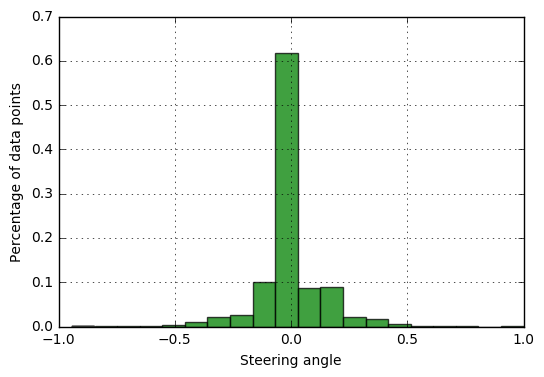

In [3]:
angle, _, _, _ = load_data("data/driving_log.csv")
plt.hist(angle, bins=20, weights= np.ones(len(angle)) / len(angle), color='g', alpha=0.75);
plt.grid()
plt.ylabel("Percentage of data points")
plt.xlabel("Steering angle")

Number of data point  737


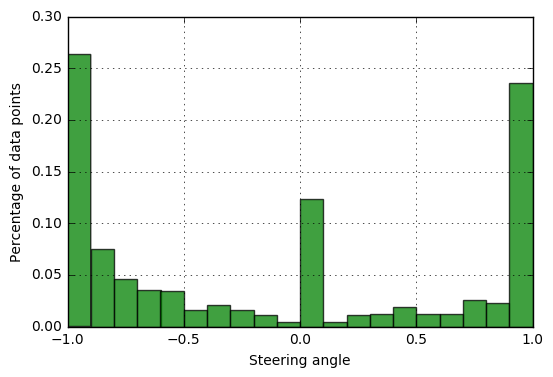

In [4]:
angle, _, _, _ = load_data("data/track1_rescue3.csv")
plt.hist(angle, bins=20, weights= np.ones(len(angle)) / len(angle), color='g', alpha=0.75);
plt.grid()
plt.ylabel("Percentage of data points")
plt.xlabel("Steering angle")

### Image Cropping

In [5]:
data_file = "data/driving_log.csv"
_, center, left, right = load_data(data_file)
idx = np.random.randint(0, len(center) - 1)
c_img = plt.imread(center[idx])

Number of data point  8036


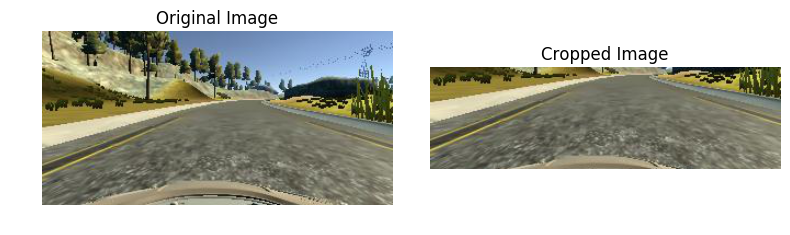

In [6]:
crop_s = 56
crop_e = 150

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(8, 4)
ax1.imshow(c_img)
ax1.axis('off')
ax1.set_title("Original Image")
ax2.imshow(c_img[crop_s:crop_e, ])
ax2.axis('off')
ax2.set_title("Cropped Image")
fig.tight_layout()

### Sharp Turn Dataset

In [7]:
data_file = "data/track1_rescue3.csv"
_, center, left, right = load_data(data_file)
idx = np.random.randint(0, len(center) - 1)
# idx = 225
c_img = plt.imread(center[idx])
l_img = plt.imread(left[idx])
r_img = plt.imread(right[idx])

Number of data point  737


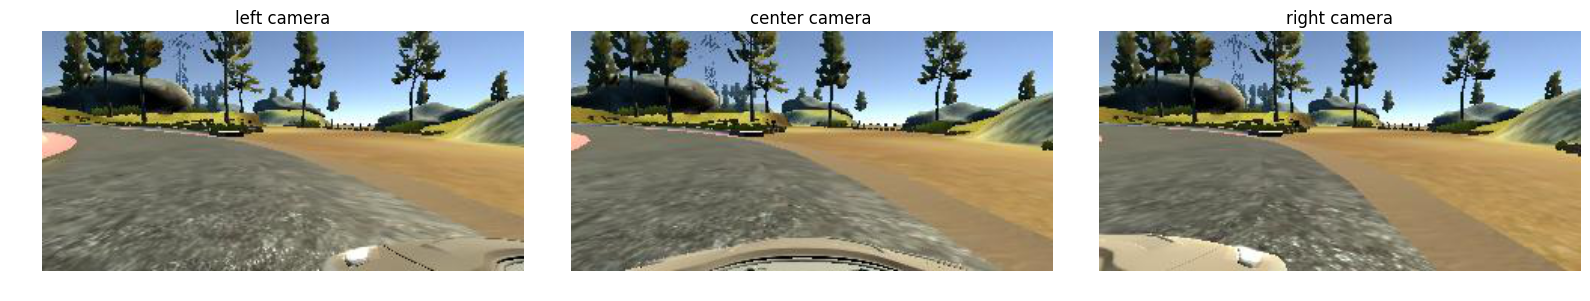

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(16, 8)
ax1.imshow(l_img)
ax1.axis('off')
ax1.set_title("left camera")
ax2.imshow(c_img)
ax2.axis('off')
ax2.set_title("center camera")
ax3.imshow(r_img)
ax3.axis('off')
ax3.set_title("right camera")
fig.tight_layout()

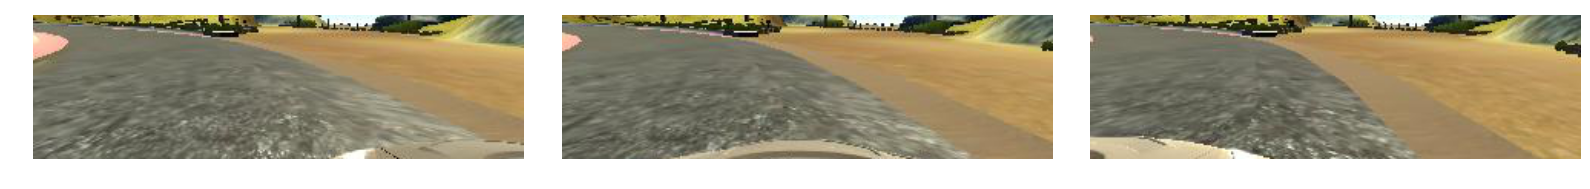

In [9]:
crop_s = 56
crop_e = 150

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(16, 8)
ax1.imshow(l_img[crop_s:crop_e, ])
ax1.axis('off')
ax2.imshow(c_img[crop_s:crop_e, ])
ax2.axis('off')
ax3.imshow(r_img[crop_s:crop_e, ])
ax3.axis('off')
fig.tight_layout()

### Loss Funtion

In [34]:
BATCH_SIZE = 64
DATA_SIZE = 7232

def get_loss(log_file):
    val_loss = []
    train_loss = []
    with open(log_file) as f:
        for line in f:
            if line.startswith("Train loss"):
                loss = np.float32(line.strip().split(" ")[2])
                train_loss.append(loss)
            elif line.startswith("Validation loss"):
                loss = np.float32(line.strip().split(" ")[2])
                val_loss.append(loss)            
    return train_loss, val_loss

def plot_loss(log_file, data_size, ymax=None):
    train_loss, val_loss = get_loss(log_file)
    steps = np.arange(len(train_loss)) * 50.0
    epochs = steps * BATCH_SIZE / data_size
    
    t, v = plt.plot(epochs, train_loss, 'g', epochs, val_loss, 'b')
    if ymax:
        plt.ylim(0, ymax)
    xmax = int(np.max(epochs))
    plt.xlim(0, xmax)
    plt.legend([t, v], ["train", "validation"])
    plt.ylabel("mse")
    plt.xlabel("epochs")
    plt.grid()
    plt.minorticks_on()

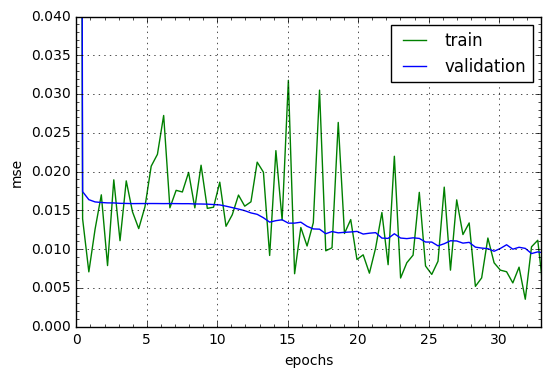

In [43]:
plot_loss("logs/baseline/tstr377_e30_1/train.log", 7232, ymax=0.04)

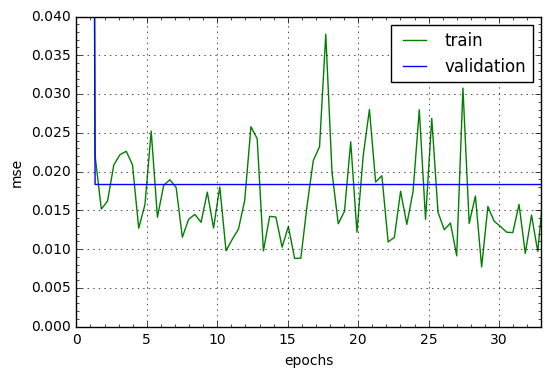

In [44]:
plot_loss("logs/baseline/tstr377_e30_2/train.log", 7232, ymax=0.04)

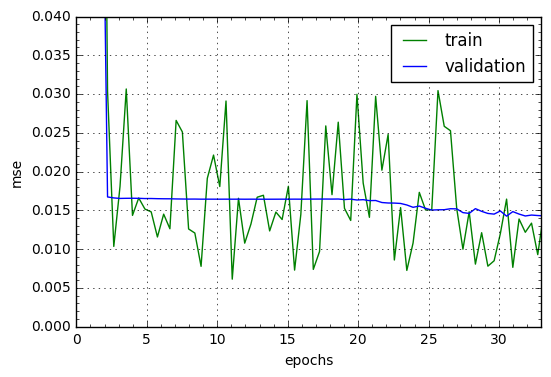

In [45]:
plot_loss("logs/baseline/tstr378_e30_1/train.log", 7232, ymax=0.04)

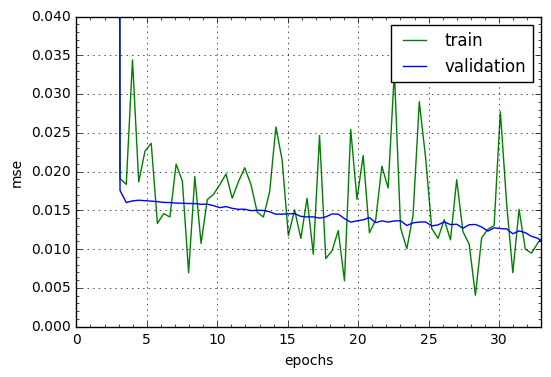

In [46]:
plot_loss("logs/baseline/tstr378_e30_2/train.log", 7232, ymax=0.04)

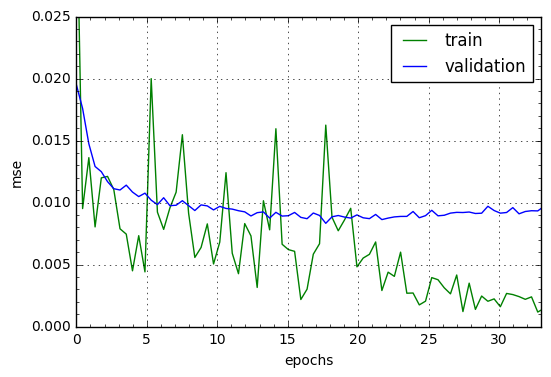

In [12]:
plot_loss("logs/normalize/tstr377_e30/train.log", 7232, ymax=0.025)

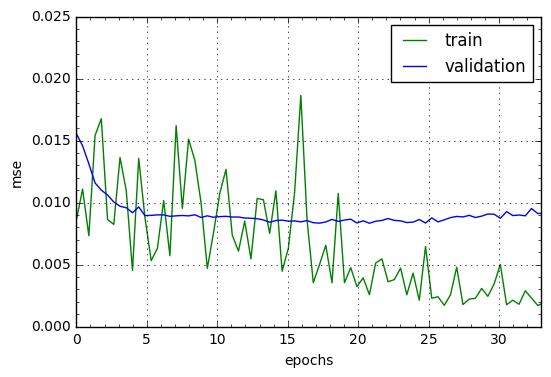

In [26]:
plot_loss("logs/normalize/mac_e30_2/train.log", 7232, ymax=0.025)

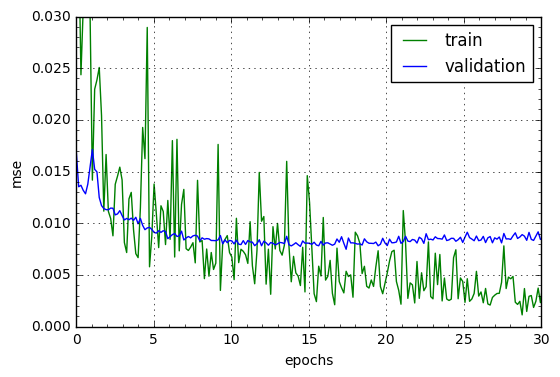

In [13]:
plot_loss("logs/use_side_cams/tstr378_e30_1/train.log", 21697, ymax=0.03)

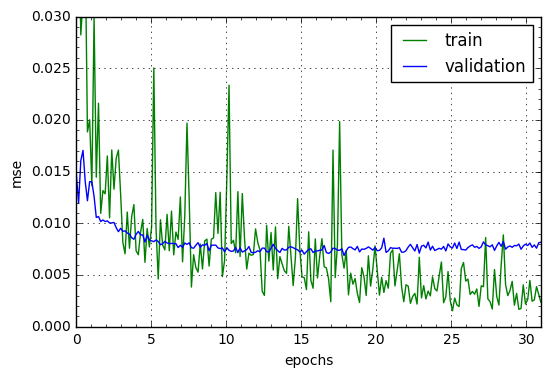

In [14]:
plot_loss("logs/use_side_cams/tstr378_e30_2/train.log", 21697, ymax=0.03)

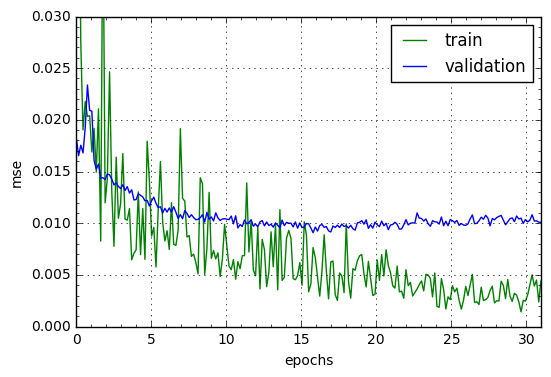

In [15]:
plot_loss("logs/use_side_cams/tstr378_e30_3/train.log", 21697, ymax=0.03)

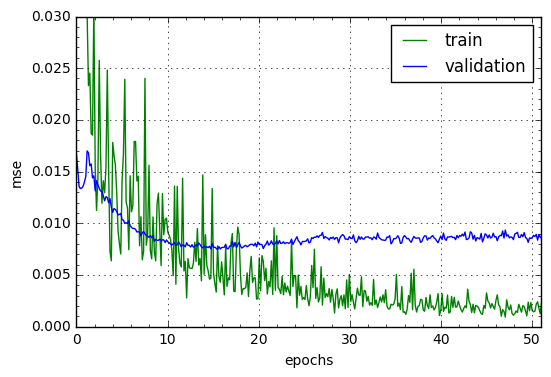

In [16]:
plot_loss("logs/use_side_cams/tstr378_e50_1/train.log", 21697, ymax=0.03)

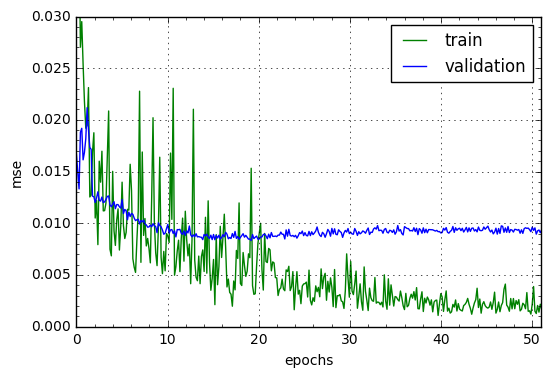

In [17]:
plot_loss("logs/use_side_cams/tstr378_e50_2/train.log", 21697, ymax=0.03)

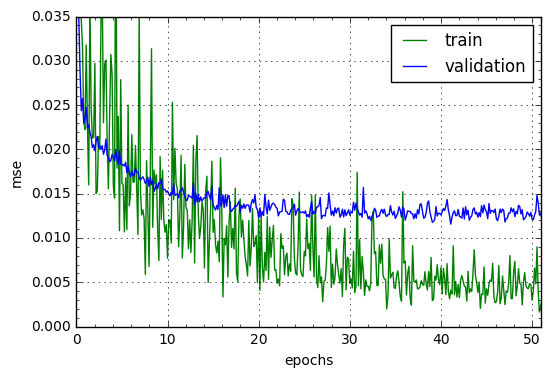

In [18]:
plot_loss("logs/rescue3/tstr377_e50_1/train.log", 23689, ymax=0.035)

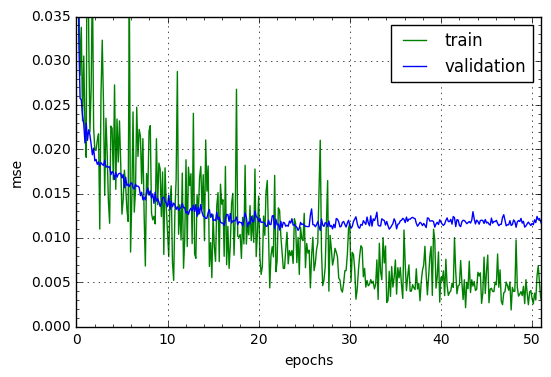

In [19]:
plot_loss("logs/rescue3/tstr377_e50_2/train.log", 23689, ymax=0.035)

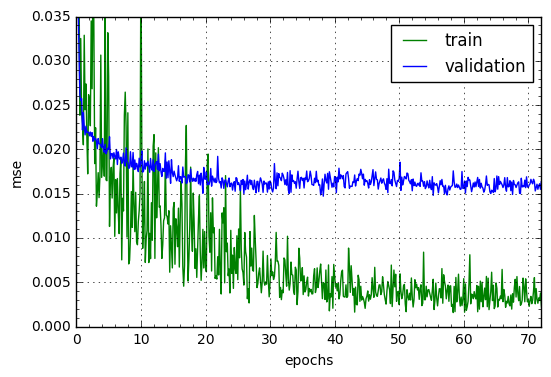

In [20]:
plot_loss("logs/rescue3/tstr377_e70_1/train.log", 23689, ymax=0.035)

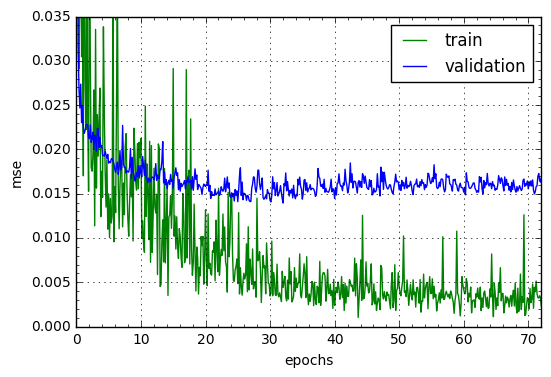

In [21]:
plot_loss("logs/rescue3/tstr378_e70_1/train.log", 23689, ymax=0.035)

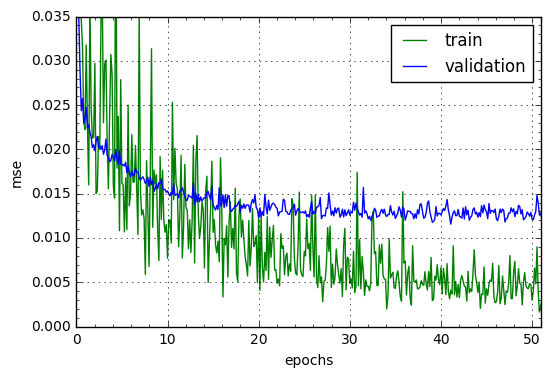

In [28]:
plot_loss("logs/rescue3/tstr377_e50_1/train.log", 23689, ymax=0.035)

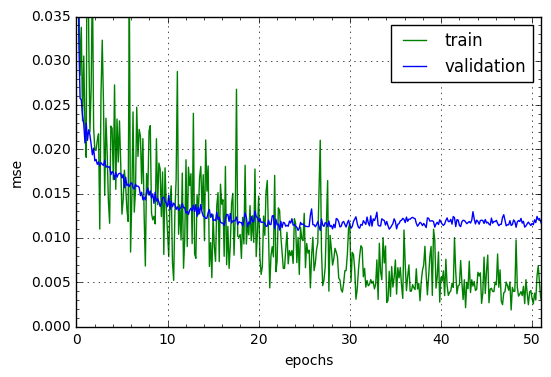

In [29]:
plot_loss("logs/rescue3/tstr377_e50_2/train.log", 23689, ymax=0.035)

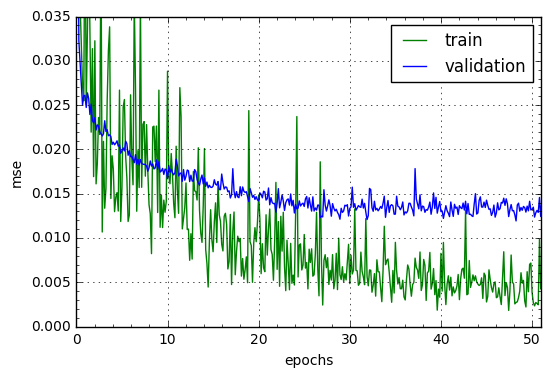

In [30]:
plot_loss("logs/rescue3/tstr378_e50_1/train.log", 23689, ymax=0.035)

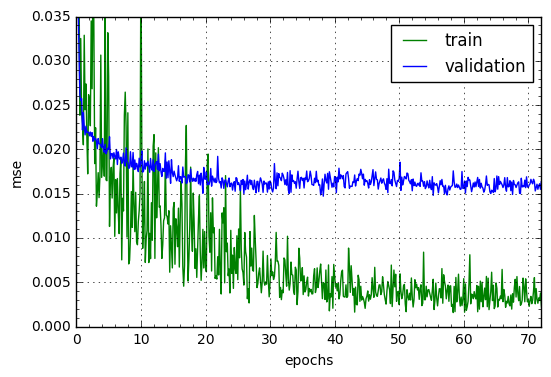

In [31]:
plot_loss("logs/rescue3/tstr377_e70_1/train.log", 23689, ymax=0.035)

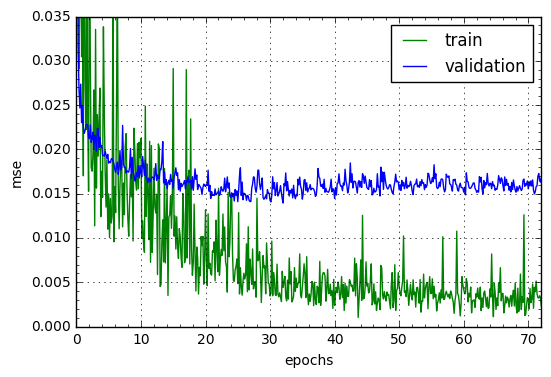

In [32]:
plot_loss("logs/rescue3/tstr378_e70_1/train.log", 23689, ymax=0.035)